In [11]:
%matplotlib inline
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
image_files = list('images\\'+i for i in os.listdir('images'))

In [13]:
"""all_npimages = []

for i in image_files:
    img = Image.open(image_files[0])
    npimg = np.array(img, 'uint8')
    all_npimages.append(npimg)"""     #MEMORY ERROR

"all_npimages = []\n\nfor i in image_files:\n    img = Image.open(image_files[0])\n    npimg = np.array(img, 'uint8')\n    all_npimages.append(npimg)"

In [14]:
boxes = pd.read_csv('training.csv')
boxes

,image_name,x1,x2,y1,y2
0,JPEG_20160706_121146_1000145715002.png,115,495,143,325
1,JPEG_20161119_174038_1000690577600.png,23,457,61,409
2,147444927651111470309333776-Roadster-Men-Casua...,37,601,13,470
3,147772332675720161028_161611.png,27,602,162,385
4,1473315333651DeeplearnS11638.png,60,586,174,325
5,JPEG_20161129_143914_1000304878557.png,35,549,37,442
6,JPEG_20161028_100621_1000815239330.png,77,558,86,434
7,1475060075141DSC02381.png,50,627,95,320
8,1473317734429DeeplearnS142.png,104,552,83,428
9,JPEG_20160607_153530_1000669241198.png,134,500,67,429


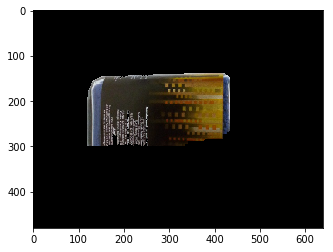

In [78]:
iname = 'JPEG_20160628_132442_1000306311172.png'
img = cv2.imread('images\\'+iname)
cimg = img.copy()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,250)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fimg = img*mask2[:,:,np.newaxis]
 
plt.imshow(fimg)

In [79]:
_,x1,x2,y1,y2 = boxes[boxes['image_name']==iname].values[0]
#fimgc = fimg.copy()
#bimg = cv2.rectangle(fimg, (x1,y1),(x2,y2),(255,0,0),2)
#plt.imshow(bimg)

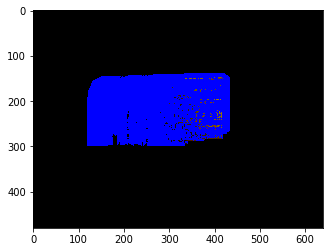

In [80]:
fimg[np.where((fimg!=[0,0,0]).all(axis=2))] = [0,0,255]
plt.imshow(fimg)

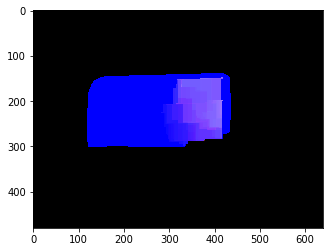

In [81]:
kernel1 = np.ones((40,40),np.uint8)
closing = cv2.morphologyEx(fimg, cv2.MORPH_CLOSE, kernel1)
plt.imshow(closing)

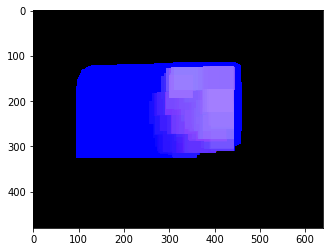

In [82]:
kernel2 = np.ones((11,11),np.uint8)
dilation = cv2.dilate(closing,kernel2,iterations = 5)
plt.imshow(dilation)

In [83]:
xmax, ymax, xmin, ymin = 0,0,639,479

for i in range(0,479):
    for j in range(0,639):
        if np.array_equal(dilation[i][j],np.array([0,0,255])):
            #print(i,j)
            if j<xmin:
                xmin = j
            if j>xmax:
                xmax = j
            if i<ymin:
                ymin = i
            if i>ymax:
                ymax = i 

print(xmin, ymin, xmax, ymax)

95 114 460 325


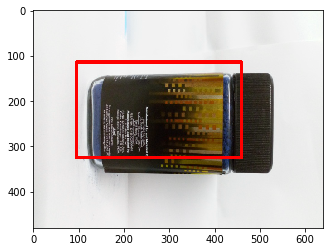

In [84]:
bimg = cv2.rectangle(cimg, (xmin, ymin), (xmax, ymax),(255,0,0),5)    ##  OUR PREDICTION : RED
plt.imshow(bimg)

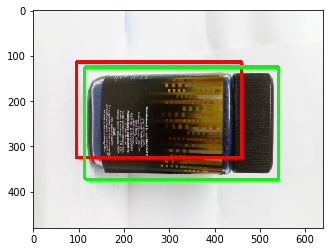

In [85]:
bimg = cv2.rectangle(cimg, (x1,y1),(x2,y2),(0,255,0),5)             ## GIVEN BOX:   GREEN
plt.imshow(bimg)